<a href="https://colab.research.google.com/github/sensei-jirving/Online-DS-PT-01.24.22-cohort-notes/blob/main/Week_06/Lecture_01/OfficeHours/Copy_of_CodeAlong_Regression_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://course_report_production.s3.amazonaws.com/rich/rich_files/rich_files/2470/s300/cd-logo-blue-600x600.png" alt="Coding Dojo Logo" class="center" height="50">

# Regression - Metrics


*Make a copy of this notebook to edit!*

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn.searchenginejournal.com%2Fwp-content%2Fuploads%2F2020%2F08%2Fcopy-the-colab-notebook-to-your-google-drive-5f2579179f746.jpg&f=1&nofb=1" alt="Make a copy" class="center" height="300">

</center>

## Task

Your task is to build the best model possible using [this dataset](https://docs.google.com/spreadsheets/d/1JCXULApcqesUDbAzKFYGAWvphWx0K36J0bGyiniprWw/edit?usp=sharing). Your goal is to predict the price of the houses using various information. Use linear regression to make predictions and evaluate your model.  Be sure to develop a baseline using the mean of your training y values.  Find the MAE, MSE, RMSE, and R2.

The data given is from Kaggle(https://www.kaggle.com/harlfoxem/housesalesprediction) and was scraped from the [King County government website](https://data.kingcounty.gov/)

In [12]:
# imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline

from sklearn import set_config
set_config(display='diagram')

In [13]:
# load the dataset, you can assume this data is already cleaned.
path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vR33clYD7L7KarKwDrJr1GzW7GQRbTIzITBBHA7J-luNwIJylRrQR74p_k6AHJE-OfI5y3L2KmFIWo7/pub?output=csv'
df = pd.read_csv(path)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
# the 'zipcode' column is a nominal categorical variable  
# convert the datatype of 'zipcode' to 'object'

df['zipcode'] = df['zipcode'].astype('object')

In [15]:
# assign 'price' to y and other features to X

X = df.drop(columns='price')

y = df['price']

In [16]:
# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
# create one-hot encode the categorical columns (zipcode) and scale the numeric columns
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
scaler = StandardScaler()


# Use 2 tuples, one for numeric and one for categorical
ohe_tuple = (ohe, cat_selector)
scaler_tuple = (scaler, num_selector)

# Combine the pipelines in a ColumnTransformer with the appropriate column selectors
transformer = make_column_transformer(scaler_tuple, ohe_tuple, remainder='passthrough')

In [19]:
# define a function that takes true and predicted values as arguments

def eval_model(true, pred):
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'MAE: {mae:,.2f} \n MSE: {mse:,.2f} \n RMSE: {rmse:,.2f} \n R2: {r2:,.2f} ')
# and prints all 4 metrics

In [37]:
# instantiate a baseline model using the 'mean' strategy
dummy = DummyRegressor(strategy='median')
# put your ColumnTransformer and the baseline model into a pipeline

base_pipe = make_pipeline(transformer, dummy)
# fit your pipe onto the training data
base_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f170a2e3590>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f170a2e3910>)])),
                ('dummyregressor', DummyRegressor(strategy='median'))])

In [38]:
# find MAE, MSE, RMSE and R2 on the baseline model for both the train and test data

print('Train Evaluation')

eval_model(y_train, base_pipe.predict(X_train))

print('\n Test Evaluation')

eval_model(y_test, base_pipe.predict(X_test))

Train Evaluation
MAE: 219,320.22 
 MSE: 137,647,482,629.71 
 RMSE: 371,008.74 
 R2: -0.06 

 Test Evaluation
MAE: 229,679.87 
 MSE: 159,380,882,992.35 
 RMSE: 399,225.35 
 R2: -0.06 


## Office Hours 

In [42]:
## Manually calculating dummy predictions
mean_to_predict = y_train.mean()
dummy_pred = [mean_to_predict for i in range(len(X_train))]
dummy_pred

[537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,
 537560.4986735764,


In [43]:

eval_model(y_train, dummy_pred)

MAE: 231,043.36 
 MSE: 129,980,641,701.74 
 RMSE: 360,528.28 
 R2: 0.00 


In [44]:
# instantiate a linear regression model
# put your ColumnTransformer and linear regression model into a pipeline
# fit your pipe on the training data

lin_reg = make_pipeline(transformer, LinearRegression())
lin_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f170a2e3590>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f170a2e3910>)])),
                ('linearregression', LinearRegression())])

In [49]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f170a2e3590>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f170a2e3910>)])

In [54]:
num_cols = num_selector(X_train) 
cat_cols = transformer.named_transformers_['onehotencoder'].get_feature_names(cat_selector(X_train))
feature_names = num_cols + list(cat_cols)
feature_names

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'zipcode_98001',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98103'

In [61]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [62]:
coeffs = pd.Series(lin_reg[-1].coef_, index=feature_names)
coeffs.sort_values()

sqft_living     -9698482030795582.00
zipcode_98070     -68656566951730.00
zipcode_98023     -68656566913070.91
zipcode_98003     -68656566887784.29
zipcode_98198     -68656566886313.94
                        ...         
view                        43549.49
waterfront                  52962.24
grade                       65384.61
sqft_basement    4689855720679316.00
sqft_above       8787575832174145.00
Length: 87, dtype: float64

In [64]:
lin_reg[-1].intercept_

68656567260102.6

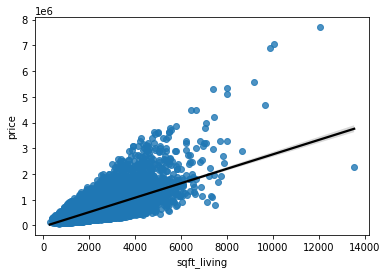

In [46]:
import seaborn as sns

# fig, axes = plt.subplots()
sns.regplot(data=df, x='sqft_living',y='price',line_kws={'color':'black'})

In [47]:
# find MAE, MSE, RMSE, and R2 of the linear regreesion model on both train and test data

print('Train Evaluation')

eval_model(y_train, lin_reg.predict(X_train))

print('\nTest Evaluation')

eval_model(y_test, lin_reg.predict(X_test))

Train Evaluation
MAE: 95,023.19 
 MSE: 24,963,388,337.70 
 RMSE: 157,998.06 
 R2: 0.81 

Test Evaluation
MAE: 97,610.86 
 MSE: 28,793,626,852.23 
 RMSE: 169,686.85 
 R2: 0.81 


In [48]:
print('DummyRegressor Test Evaluation')
eval_model(y_test, base_pipe.predict(X_test))

print('\nLinReg Evaluation')
eval_model(y_test, lin_reg.predict(X_test))

DummyRegressor Test Evaluation
MAE: 229,679.87 
 MSE: 159,380,882,992.35 
 RMSE: 399,225.35 
 R2: -0.06 

LinReg Evaluation
MAE: 97,610.86 
 MSE: 28,793,626,852.23 
 RMSE: 169,686.85 
 R2: 0.81 


# Evaluate:

* What does your model's MAE score mean in the context of this dataset?
* What does the MSE score mean?
* What does the RMSE score mean?
* How about the R^2?

# BONUS!

* Is your model overfit?  How do you know?